<a href="https://colab.research.google.com/github/SowmyaLR/Books/blob/master/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [120]:
df = pd.read_csv('winequality-white.csv')
df = df.drop_duplicates()
df = df.dropna()
df.shape

(3961, 12)

In [121]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [122]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02281d7e48>,
      dtype=object)

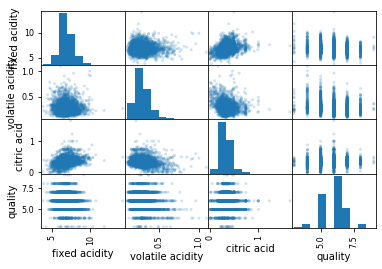

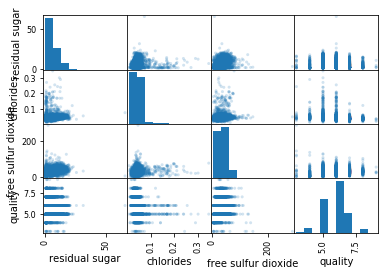

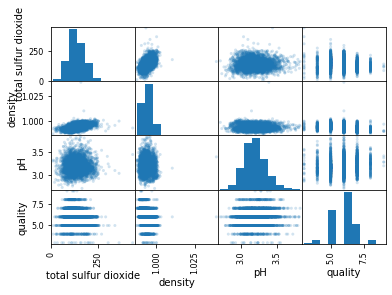

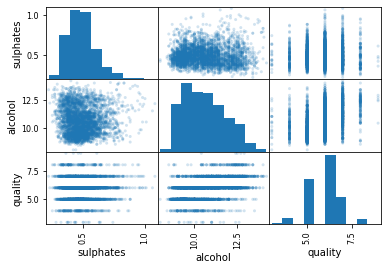

In [123]:
from pandas.plotting import scatter_matrix

tmp = df[['fixed acidity', 'volatile acidity', 'citric acid', 'quality']]

tmp1 = df[['residual sugar','chlorides', 'free sulfur dioxide', 'quality']]

tmp2 = df[['total sulfur dioxide', 'density', 'pH', 'quality']]

tmp3 = df[['sulphates', 'alcohol', 'quality']]

scatter_matrix(tmp, alpha=0.2)
scatter_matrix(tmp1, alpha=0.2)
scatter_matrix(tmp2, alpha=0.2)
scatter_matrix(tmp3, alpha=0.2)

In [124]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality'] 

X = df[features]
y = df[target]

X.shape

(3961, 10)

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1)

X_train.shape, X_test.shape

((3168, 10), (793, 10))

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
ccp = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = ccp.ccp_alphas, ccp.impurities


Text(0, 0.5, 'IMPURITIES')

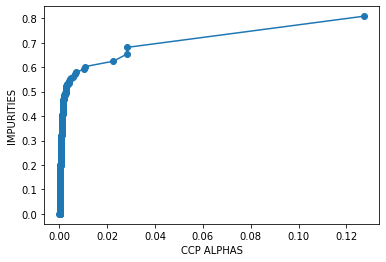

In [127]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker='o')
ax.set_xlabel('CCP ALPHAS')
ax.set_ylabel('IMPURITIES')

Text(0, 0.5, 'Impurities')

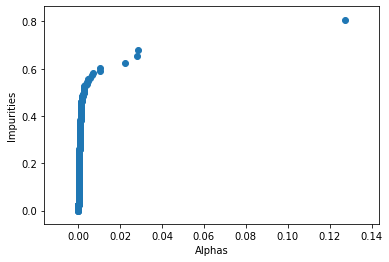

In [128]:
plt.scatter(ccp_alphas, impurities)
plt.xlabel('Alphas')
plt.ylabel('Impurities')

In [0]:
models=[]
for ccp_al in ccp_alphas:
  model = DecisionTreeRegressor(random_state=1,ccp_alpha=ccp_al)
  model.fit(X_train,y_train)
  models.append(model)

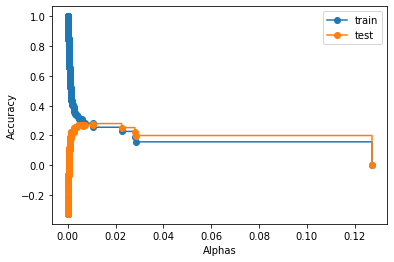

In [130]:
training_score = [model.score(X_train, y_train) for model in models]
test_score = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.plot(ccp_alphas, training_score, marker='o', label="train",
        drawstyle="steps-post")

ax.plot(ccp_alphas, test_score, marker='o', label="test",
        drawstyle="steps-post")

ax.set_xlabel('Alphas')
ax.set_ylabel('Accuracy')

ax.legend()

[Accuracy VS Alpha for all features](https://github.com/SowmyaLR/neural-networks/blob/basic_stuff/alphaVsAccuracy.png)

In [136]:
import numpy as np

np.asarray(y)

array([[6],
       [6],
       [6],
       ...,
       [6],
       [7],
       [6]])

In [134]:

models[0].predict(X_test)

Original value:       quality
0           6
1           6
2           6
3           6
6           6
...       ...
4893        6
4894        5
4895        6
4896        7
4897        6

[3961 rows x 1 columns]


array([5., 5., 5., 6., 6., 7., 4., 7., 6., 7., 7., 5., 4., 5., 5., 6., 6.,
       6., 8., 5., 6., 6., 6., 5., 6., 5., 7., 7., 5., 5., 6., 8., 5., 5.,
       7., 6., 5., 5., 8., 7., 4., 6., 8., 6., 6., 6., 5., 5., 5., 6., 6.,
       5., 7., 6., 6., 5., 6., 6., 6., 4., 6., 5., 5., 4., 6., 8., 5., 5.,
       6., 5., 8., 7., 5., 5., 7., 6., 5., 6., 5., 7., 7., 8., 6., 8., 6.,
       5., 5., 7., 6., 6., 6., 6., 6., 6., 6., 5., 4., 5., 7., 5., 6., 7.,
       6., 5., 8., 5., 5., 7., 5., 7., 6., 6., 7., 8., 7., 6., 7., 6., 6.,
       6., 8., 5., 5., 5., 5., 6., 7., 6., 4., 6., 6., 7., 5., 8., 6., 6.,
       6., 6., 6., 5., 5., 4., 6., 4., 8., 6., 6., 7., 4., 6., 7., 6., 6.,
       7., 5., 5., 6., 5., 7., 6., 7., 6., 5., 7., 5., 7., 5., 6., 6., 5.,
       6., 4., 6., 7., 4., 6., 6., 6., 6., 7., 7., 7., 6., 6., 5., 6., 6.,
       7., 6., 7., 4., 5., 4., 5., 6., 7., 6., 6., 5., 6., 5., 7., 5., 5.,
       6., 6., 7., 7., 5., 6., 5., 7., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 7., 7., 6.